## Task: To predict the employee attrition
use Feature selection to identify variables contributing most in attrition

In [1]:
import os
#print(os.getcwd())
os.chdir(r"C:\Users\idstwy\Desktop")

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.set_option('display.max_columns', 1000)
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Set file directories
inputPath = (r"C:\Users\idstwy\Desktop")
folder = "\\IBM_HR"
file = "\\ibm-hr-analytics-attrition-dataset.csv"

In [4]:
#Read CSV
raw = pd.read_csv(inputPath + folder + file, index_col=None, header=0,  sep=',')

#standardized column names
raw.columns = [re.sub(r'\W+', '', i.lower()) for i in raw.columns]

## Inspect Data Structure & Underlying Data Distribution

In [5]:
print("Data rows x cols :", raw.shape, "\n")
print("List of features :", list(raw.columns), "\n")
raw.head(3)

Data rows x cols : (1470, 35) 

List of features : ['age', 'attrition', 'businesstravel', 'dailyrate', 'department', 'distancefromhome', 'education', 'educationfield', 'employeecount', 'employeenumber', 'environmentsatisfaction', 'gender', 'hourlyrate', 'jobinvolvement', 'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus', 'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'over18', 'overtime', 'percentsalaryhike', 'performancerating', 'relationshipsatisfaction', 'standardhours', 'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance', 'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager'] 



,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0


In [6]:
#inspect data structure 
def dataInspect (dfX):
    colHeader = []
    dtypes =[]
    count = [] 
    values = [] 
    for i in list(dfX.columns):  
        n = dfX[i].unique()
        typee = dfX[i].dtypes
        values.append(n)
        colHeader.append(i)
        count.append(len(n))
        dtypes.append(typee)
    df = pd.DataFrame({'colHeader': colHeader, 'dtypes': dtypes, 'countUniqueVal': count, 'values': values})
    return df

dataInspect(raw)

,colHeader,dtypes,countUniqueVal,values
0,age,int64,43,"[41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2..."
1,attrition,object,2,"[Yes, No]"
2,businesstravel,object,3,"[Travel_Rarely, Travel_Frequently, Non-Travel]"
3,dailyrate,int64,886,"[1102, 279, 1373, 1392, 591, 1005, 1324, 1358,..."
4,department,object,3,"[Sales, Research & Development, Human Resources]"
5,distancefromhome,int64,29,"[1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5..."
6,education,int64,5,"[2, 1, 4, 3, 5]"
7,educationfield,object,6,"[Life Sciences, Other, Medical, Marketing, Tec..."
8,employeecount,int64,1,[1]
9,employeenumber,int64,1470,"[1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,..."


## Exploratory Data Analysis

In [7]:
#split features into Numerical VS Categorical 
chkDtypes = raw.dtypes
NumCols = raw.select_dtypes(include =['number'])
CatCols = raw.select_dtypes(exclude =['number'])

In [8]:
NumCols.describe()

,age,dailyrate,distancefromhome,education,employeecount,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


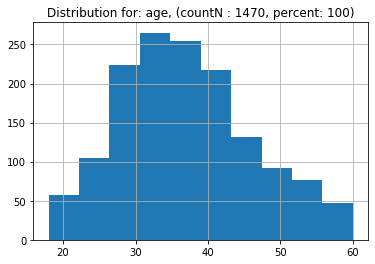

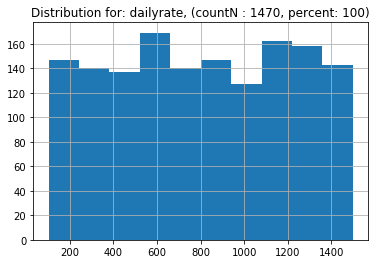

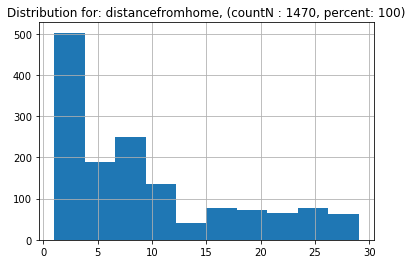

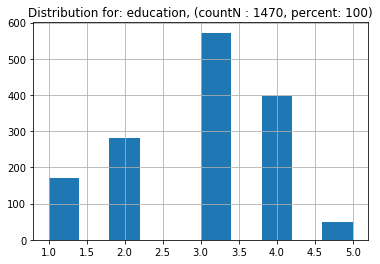

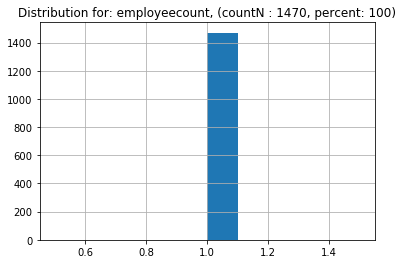

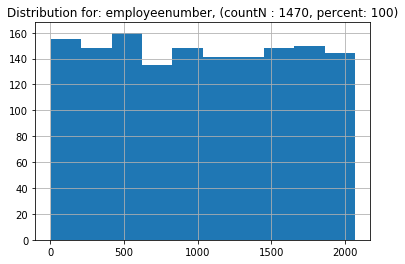

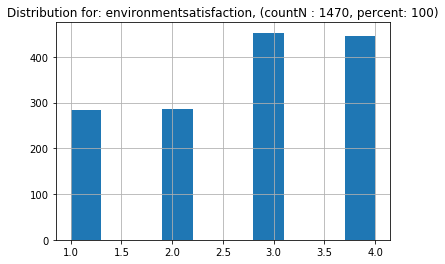

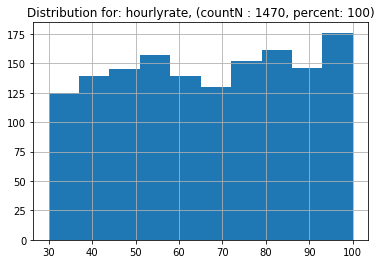

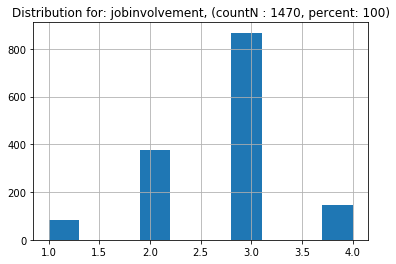

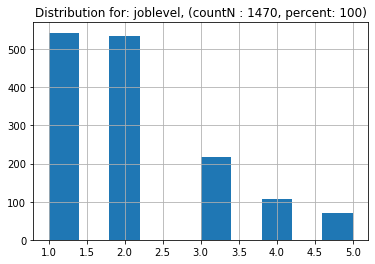

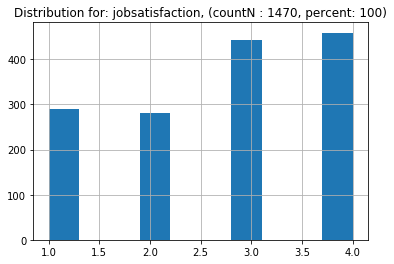

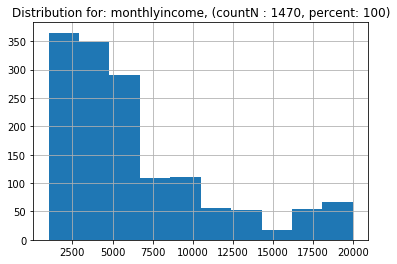

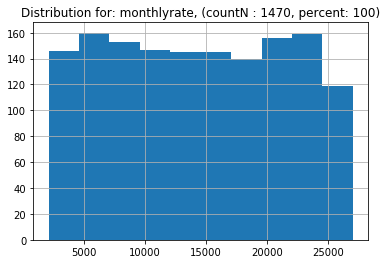

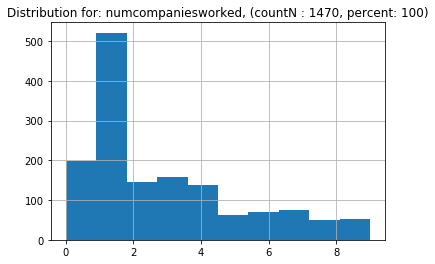

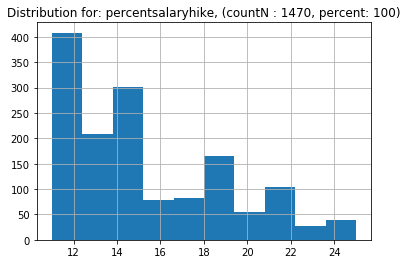

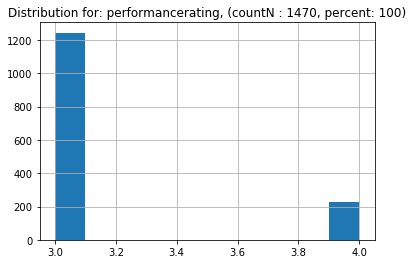

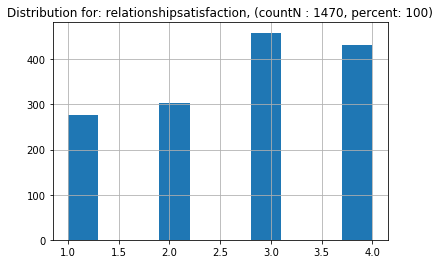

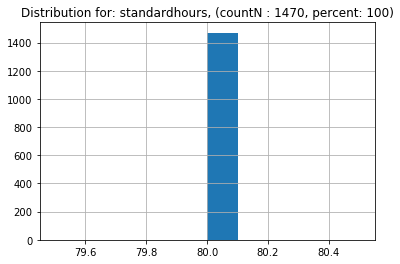

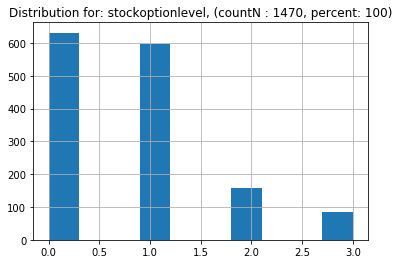

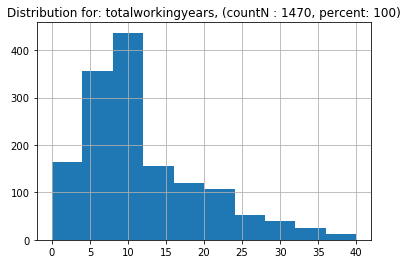

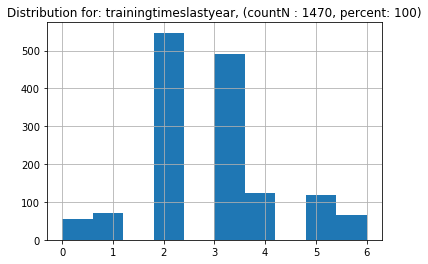

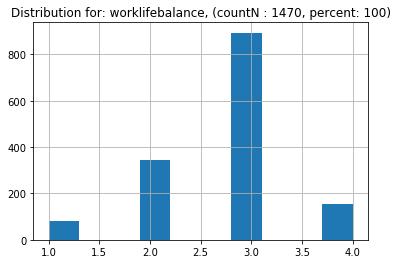

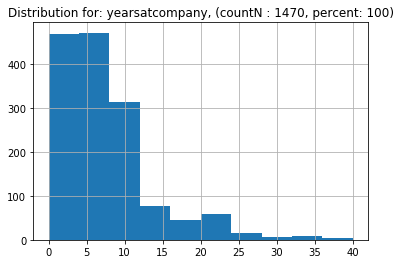

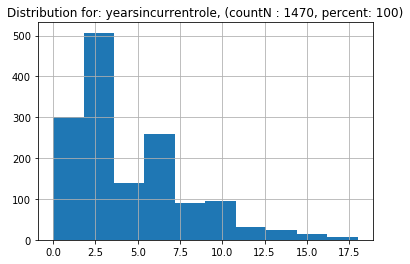

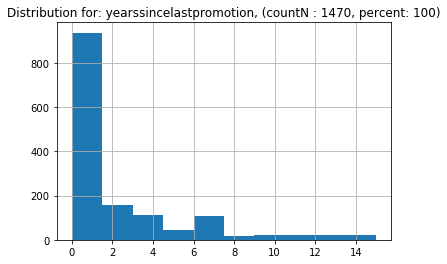

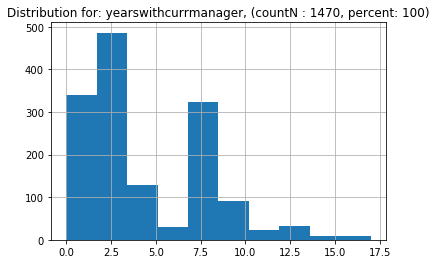

In [9]:
#plot histogram for all numeric columns in df
def plt_numCols(raw_X):
    NbrRecords = len(raw_X)
    for i in raw_X.columns:
            raw_X[i] = pd.to_numeric(raw_X[i], errors='coerce')
            countN = len(raw_X[raw_X[i].notnull()])
            countN_percent = round((countN / NbrRecords)*100, 1)
            plt.figure(i);
            plt.title("Distribution for: %s, (countN : %d, percent: %d)" %(i, countN, countN_percent))
            raw_X[i].hist()

#NumCols.describe()
plt_numCols(NumCols)

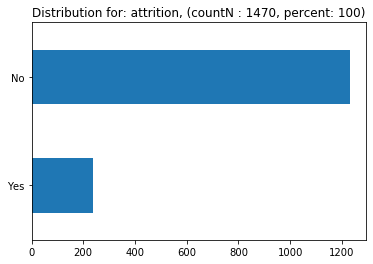

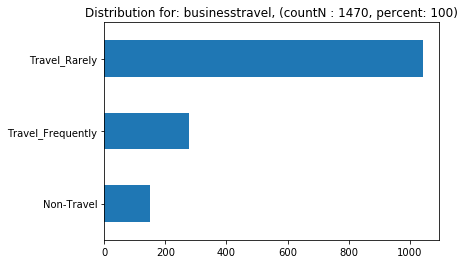

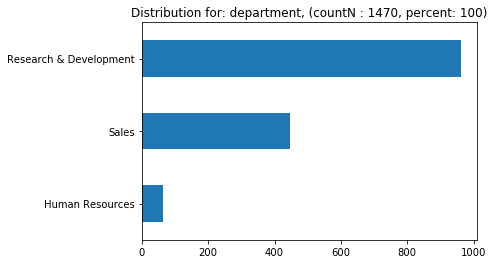

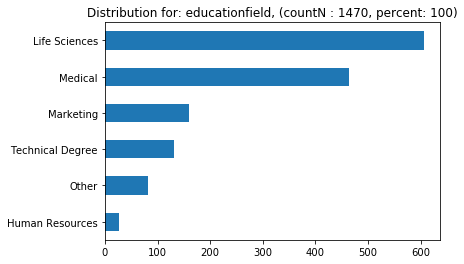

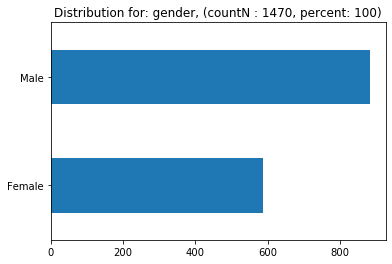

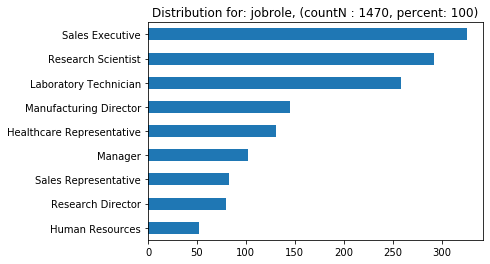

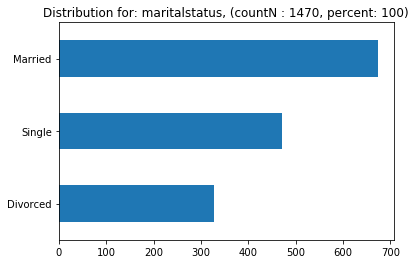

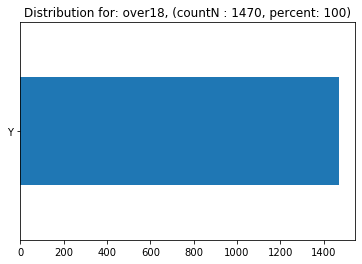

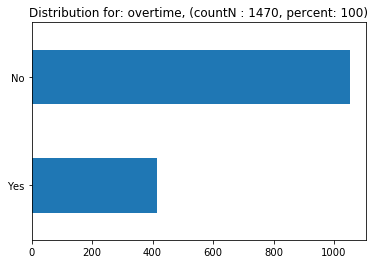

In [10]:
#plot bar charts for all categorical columns in df
def plt_objCols(raw_X):
    NbrRecords = len(raw_X)
    for i in raw_X.columns:
            countN = len(raw_X[raw_X[i].notnull()])
            countN_percent = round((countN / NbrRecords)*100, 1)
            if countN > 0: 
                plt.figure(i);
                plt.title("Distribution for: %s, (countN : %d, percent: %d)" %(i, countN, countN_percent))
                raw_X[i].value_counts().sort_values().plot(kind = 'barh')
            else : 
                print("Data Fields with no values : %s" %i)
                
plt_objCols(CatCols)

## Check for missing responses and duplicated records

In [11]:
#number records with missing values in each columns
recMissing = list(raw.columns[raw.isnull().any()])
if not recMissing:
    print("Data have No Missing values")
else: 
    for i in recMissing: 
        nbr_Rec = len(raw[raw[i].isnull()])
        print(i, nbr_Rec)
        
#Checking for duplicates for whole df
print("before dropping:", raw.shape)
raw.duplicated().any()
raw = raw.drop_duplicates()
print("after dropping:", raw.shape)

Data have No Missing values
before dropping: (1470, 35)
after dropping: (1470, 35)


In [12]:
#Notes from EDA
#1.There are total of 1470 staff
#2 16% (237) of staff attrition rate  
#3 Majority of staff age between 30s-40s

#Non-Informative features: variables = "over18", "employeecount"

# Pre-model

In [13]:
#create an ID for each employee
raw["empID"] = [i[0] for i in enumerate(range(len(raw)),1)]
raw.insert(0, "empID", raw.pop("empID"))

# create index and ID 
raw.sort_values(by="empID", inplace=True)
IDindexMapper = {k: v for k, v in enumerate(raw["empID"].unique())}

In [14]:
#Target Variable
print(raw["attrition"].value_counts(dropna=False, normalize=True))

No     0.838776
Yes    0.161224
Name: attrition, dtype: float64


In [15]:
#dropped non-informative features 
raw1 = raw.drop(columns= ["empID", "over18", "employeecount"])
raw1["attrition"] = raw1["attrition"].apply(lambda x: 1 if x == "Yes" else 0 )

In [16]:
#LabelEncoder for categorical feature columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

listOfCatCols = listOfCatCols = list(raw1.select_dtypes(include =['object']).columns)
raw1[listOfCatCols] = raw1[listOfCatCols].apply(lambda x: le.fit_transform(x))
raw1.head(3)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,1,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,80,0,7,3,3,0,0,0,0


# Machine Learning Models

In [17]:
from numpy.random import RandomState
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score
random_seed=123

Using TensorFlow backend.


In [18]:
inputX = raw1.drop(columns = "attrition")
targetY = raw1["attrition"]

In [19]:
def ML_models (A, B, ModelX, **kwargs):
    #2. kfold cross validation 
    it1 =[]
    data_ix, data_y, data_yPred = [], [], []
    acc1, preci1, rr1, f11 = [], [], [], []
    iteration=0
    kf = KFold(n_splits=5, random_state=random_seed, shuffle=False)

    for train_ix, test_ix in kf.split(A):
        iteration +=1
        #print(iteration)

        #3. get data
        train_X, test_X = A[train_ix], A[test_ix]
        train_y, test_y = B[train_ix], B[test_ix]

        #4. SMOTE 
        sm = SMOTE(random_state=random_seed)
        train_X_res, train_y_res = sm.fit_sample(train_X, train_y)    

        #5. fit model 
        #ModelX = LogisticRegression(max_iter=1000, random_state=random_seed)
        ModelX.fit(train_X_res, train_y_res)

        #6. make predictions
        yPred = ModelX.predict(test_X)
        
        #7. compute scores
        rr = recall_score(test_y, yPred, average='binary', pos_label=1, zero_division="warn")
        acc = accuracy_score(test_y, yPred)
        preci = precision_score(test_y, yPred)
        f1score = f1_score(test_y, yPred)
        
        lenX = len(yPred)
        itera = np.repeat(iteration,lenX)
        rr = np.repeat(rr,lenX)
        acc = np.repeat(acc,lenX)
        preci = np.repeat(preci,lenX)
        f1score = np.repeat(f1score,lenX)

        #7. store
        it1.extend(itera)
        acc1.extend(acc)
        rr1.extend(rr)
        preci1.extend(preci)
        f11.extend(f1score)
        
        data_ix.extend(test_ix)
        data_y.extend(np.squeeze(test_y))
        data_yPred.extend(yPred)
        
        
    resultDF = pd.DataFrame([it1, data_ix, data_y, data_yPred, acc1, f11, preci1, rr1]).T
    resultDF.columns = ['Iter_Nbr', "IDs", "y_Actual", "y_Pred", "Accuracy", "f1", "Precision", "Recall"]
    return resultDF

def print_results (resultDFX, model):

    #8. get the mean score & 95% CI of the score estimates over k iterations 
    a = resultDF["Accuracy"].unique()
    b = resultDF["f1"].unique()
    c = resultDF["Precision"].unique()
    d = resultDF["Recall"].unique()

    print("===================")
    print( model)
    print("===================")
    print("Accuracy  : %0.3f (+/- %0.2f)" % (a.mean(), a.std()))
    print("f1        : %0.3f (+/- %0.2f)" % (b.mean(), b.std()))
    print("Precision : %0.3f (+/- %0.2f)" % (c.mean(), c.std()))
    print("Recall    : %0.3f (+/- %0.2f)" % (d.mean(), d.std()))
    
    #9. Making the Confusion Matrix & Append results to list 
    data_y = resultDFX["y_Actual"]
    data_yPred = resultDFX["y_Pred"]
    
    # Reverse factorize
    reversefactor = dict(zip(range(3),["No", "Yes"]))
    D1 = np.vectorize(reversefactor.get)(data_y) #y_test 
    D1 = np.squeeze(D1)
    E1 = np.vectorize(reversefactor.get)(data_yPred) #y_pred
    confusion_matrix = pd.crosstab(D1, E1, rownames=['Actual'], colnames=['Predicted'], dropna=False, margins=True) #y_test, y_pred1
    #display(confusion_matrix)
    return confusion_matrix

## Preliminary Models with all Features (32)

In [20]:
#1. Normalize the data
scaler = MinMaxScaler()
scaler.fit(inputX)
X = scaler.transform(inputX)
y = targetY.values
print("Input shape:", X.shape, "\n")


from sklearn.linear_model import LogisticRegression 
Model = "LogisticRegression"
ModelX=LogisticRegression(max_iter=1000, random_state=random_seed)
resultDF = ML_models (X, y, ModelX)
result_CM = print_results (resultDF, Model) 

from sklearn.naive_bayes import GaussianNB
Model = "NaiveBayes"
ModelX = GaussianNB()
resultDF = ML_models (X, y, ModelX)
result_CM = print_results (resultDF, Model) 

from sklearn.tree import DecisionTreeClassifier 
Model = "DecisionTreeClassifier"
ModelX=DecisionTreeClassifier(criterion='gini', random_state=random_seed) 
resultDF = ML_models (X, y, ModelX)
result_CM = print_results (resultDF, Model)  

from sklearn.neighbors import KNeighborsClassifier
Model  = "KNeighborsClassifier"
ModelX = KNeighborsClassifier(n_neighbors = 5)
resultDF = ML_models (X, y, ModelX)
result_CM = print_results (resultDF, Model)

from sklearn.ensemble import AdaBoostClassifier
Model  = "AdaBoost"
ModelX = AdaBoostClassifier(learning_rate=0.01, random_state=random_seed) 
resultDF = ML_models (X, y, ModelX)
result_CM = print_results (resultDF, Model)

from sklearn.svm import SVC
Model  = "SVC"
ModelX = SVC(probability=False, random_state=random_seed) 
resultDF = ML_models (X, y, ModelX)
result_CM = print_results (resultDF, Model)

from sklearn.linear_model import SGDClassifier
Model  = "SGDClassifier"
ModelX = SGDClassifier(random_state=random_seed)
resultDF = ML_models (X, y, ModelX)
result_CM = print_results (resultDF, Model)

from sklearn.neural_network import MLPClassifier
Model  = "MLP"
ModelX =  MLPClassifier(hidden_layer_sizes=(12, ), solver='adam', learning_rate_init=0.001, random_state=random_seed)
resultDF = ML_models (X, y, ModelX)
result_CM = print_results (resultDF, Model)

Input shape: (1470, 32) 

LogisticRegression
Accuracy  : 0.752 (+/- 0.03)
f1        : 0.482 (+/- 0.05)
Precision : 0.364 (+/- 0.05)
Recall    : 0.718 (+/- 0.05)
NaiveBayes
Accuracy  : 0.617 (+/- 0.04)
f1        : 0.378 (+/- 0.03)
Precision : 0.256 (+/- 0.02)
Recall    : 0.724 (+/- 0.07)
DecisionTreeClassifier
Accuracy  : 0.771 (+/- 0.02)
f1        : 0.329 (+/- 0.08)
Precision : 0.309 (+/- 0.07)
Recall    : 0.353 (+/- 0.08)
KNeighborsClassifier
Accuracy  : 0.645 (+/- 0.02)
f1        : 0.376 (+/- 0.05)
Precision : 0.262 (+/- 0.05)
Recall    : 0.672 (+/- 0.06)
AdaBoost
Accuracy  : 0.735 (+/- 0.05)
f1        : 0.434 (+/- 0.05)
Precision : 0.336 (+/- 0.06)
Recall    : 0.623 (+/- 0.05)
SVC
Accuracy  : 0.821 (+/- 0.02)
f1        : 0.479 (+/- 0.04)
Precision : 0.449 (+/- 0.04)
Recall    : 0.514 (+/- 0.06)
SGDClassifier
Accuracy  : 0.701 (+/- 0.07)
f1        : 0.456 (+/- 0.05)
Precision : 0.335 (+/- 0.07)
Recall    : 0.760 (+/- 0.07)
MLP
Accuracy  : 0.784 (+/- 0.03)
f1        : 0.498 (+/- 0.04)

###  Feature Selection 1: Remove  Constant | Quasi features

In [21]:
#===========================
# Removing Constant features, features with 0 or low variance
#===========================
from sklearn.feature_selection import VarianceThreshold

def removeNonInformativeFeatures(dbX, thresX):
    constant_filter = VarianceThreshold(threshold = thresX)
    constant_filter.fit(dbX)

    in_cols = [column for column in dbX.columns if column in dbX.columns[constant_filter.get_support()]]
    ex_cols = [column for column in dbX.columns if column not in dbX.columns[constant_filter.get_support()]]
    print("Nbr of features kept:", len(in_cols))
    print("Nbr of features dropped:", len(ex_cols), "\n")

    list_inCols = [i for i in in_cols]
    list_exCols = [i for i in ex_cols if i not in []] #'proforma_Height', 'lab_BASAbsolute'

    # === remove non informative features from DB ===
    dbX1 = dbX.drop(labels=ex_cols, axis=1)
    print("input X shape:", dbX1.shape, "\n")
    print(" === features dropped ===", list_exCols, sep="\n")
    return dbX1

In [22]:
inputX1 = removeNonInformativeFeatures(inputX, 0) #Constant features
inputX2 = removeNonInformativeFeatures(inputX1, 0.01) #Quasi-Constant features

Nbr of features kept: 31
Nbr of features dropped: 1 

input X shape: (1470, 31) 

 === features dropped ===
['standardhours']
Nbr of features kept: 31
Nbr of features dropped: 0 

input X shape: (1470, 31) 

 === features dropped ===
[]


### Feature Selection 2:  Correlated Features

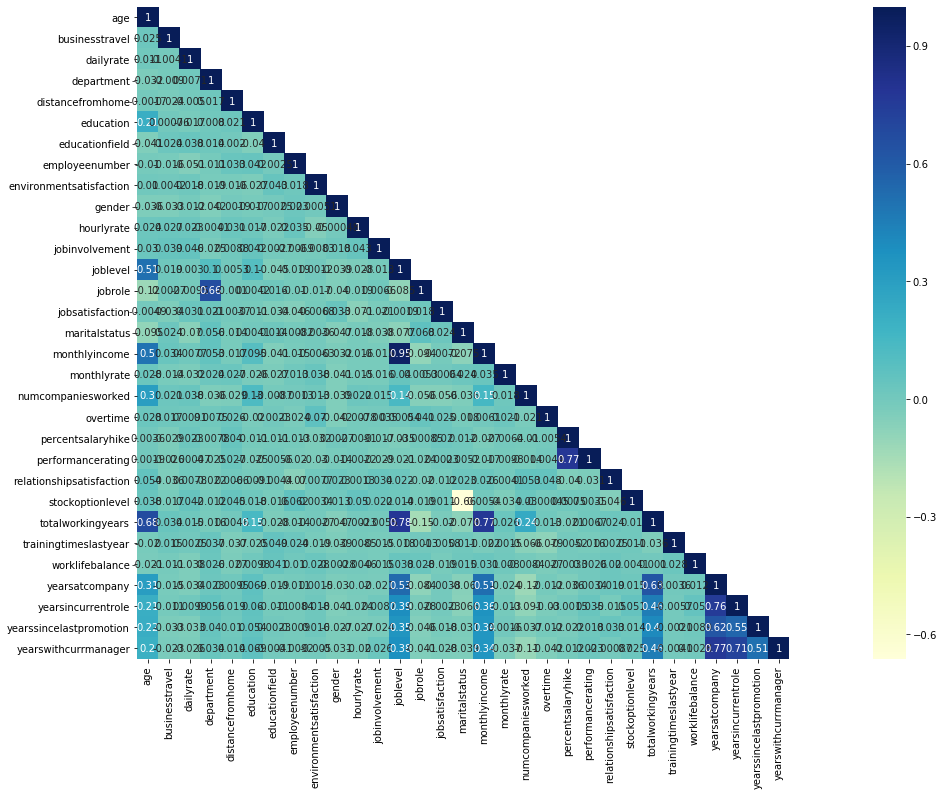

In [23]:
cor_mat= inputX2.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cbar=True, cmap="YlGnBu")

In [24]:
#Observations
#1. JobLevel is highly related to Age (Job level increases along with years of work experience)
#2. MonthlyIncome is very strongly related to joblevel (Higher ranked commands higher pay)
#3. TotalWorkingYears is highly related to JobLevel (Working experience increases along with Joblevel)
#4. YearsWithCurrManager is highly related to YearsAtCompany

### Feature Selection 3: Tree-based model

For a given feature in a tree-based model, its importance is the probability of the samples reaching that node in the tree. The value varies from 0 to 1. The value 0 means that the output of the model does not depend on the feature at all and 1 means that the output of the model is directly associated with the feature.

In [25]:
DBforTree = inputX2
print(DBforTree.shape)

(1470, 31)


In [26]:
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier

#1. Normalize the data
scaler.fit(DBforTree)
XX = scaler.transform(DBforTree)
YY = targetY.values #inputY

#2. SMOTE
sm = SMOTE(random_state=random_seed)
X_train_res, y_train_res = sm.fit_sample(XX, YY)

#3. Model
#tree = AdaBoostClassifier(n_estimators=512, random_state=random_seed, learning_rate=0.1)
#tree = ExtraTreesClassifier(n_estimators=128, criterion='gini', random_state=random_seed)
tree = GradientBoostingClassifier(n_estimators=512, random_state=random_seed, learning_rate=0.01)
fit = tree.fit(X_train_res, y_train_res)

fi_impt = fit.feature_importances_
fi_DF = pd.DataFrame(list(zip(DBforTree.columns, fi_impt))).sort_values(by=1, ascending=False)
fi_DF.columns = ["Vars", "contriVals"]
fi_DF = fi_DF[fi_DF["contriVals"]>0]

# Print the feature ranking
print("Nbr of Fis with Contribution Val >0", len(fi_DF), "\n")
print("Top 10 Feature ranking :", fi_DF.head(10), sep="\n")

Nbr of Fis with Contribution Val >0 30 

Top 10 Feature ranking :
                       Vars  contriVals
12                 joblevel    0.168368
23         stockoptionlevel    0.134000
19                 overtime    0.107582
11           jobinvolvement    0.084699
14          jobsatisfaction    0.058619
3                department    0.054989
15            maritalstatus    0.054379
26          worklifebalance    0.046304
8   environmentsatisfaction    0.039353
30     yearswithcurrmanager    0.037211


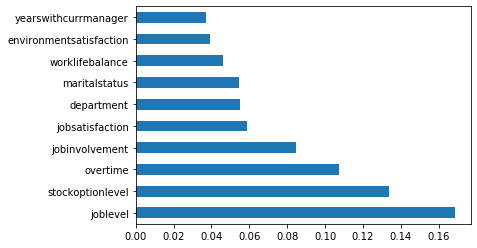

In [27]:
feat_importances = pd.Series(fi_impt, index=inputX2.columns)
feat_importances = feat_importances.nlargest(10)
feat_importances.plot(kind='barh')
plt.show()

In [28]:
append_recall = []
append_accuracy = [] 
nbr_fi =[]

for i in range(2, len(fi_DF)):
    #selectVars by adding one variable at a time based on contriVals 
    dfTemp = fi_DF.sort_values(by=["contriVals"], ascending=False)
    selectVars = list(set(list(dfTemp.head(i)["Vars"])))

    DB_subsetX = DBforTree[selectVars]
    scaler.fit(DB_subsetX)
    XX = scaler.transform(DB_subsetX)
    YY = targetY.values #inputY

    # ====  re-run with subset of features === 
    Model  = "LogisticRegression"
    ModelX=LogisticRegression(max_iter=1000, random_state=random_seed)
    resultDF = ML_models (XX, YY, ModelX)
    CM = print_results (resultDF, Model) 
     
    accuracy = (CM.iloc[0,0] + CM.iloc[1,1]) / CM.loc["All", "All"]
    recall = CM.iloc[1,1] / CM.loc["Yes", "All"]
    
    append_recall.append(recall)
    append_accuracy.append(accuracy)
    nbr_fi.append(i)
    
result_treeFi = pd.DataFrame({"Nbr_features": nbr_fi, "Accuracy":append_accuracy, "Recall":append_recall}) 

LogisticRegression
Accuracy  : 0.590 (+/- 0.03)
f1        : 0.354 (+/- 0.04)
Precision : 0.238 (+/- 0.03)
Recall    : 0.701 (+/- 0.06)
LogisticRegression
Accuracy  : 0.696 (+/- 0.02)
f1        : 0.424 (+/- 0.03)
Precision : 0.306 (+/- 0.03)
Recall    : 0.694 (+/- 0.06)
LogisticRegression
Accuracy  : 0.684 (+/- 0.02)
f1        : 0.423 (+/- 0.04)
Precision : 0.304 (+/- 0.03)
Recall    : 0.700 (+/- 0.05)
LogisticRegression
Accuracy  : 0.726 (+/- 0.02)
f1        : 0.435 (+/- 0.04)
Precision : 0.323 (+/- 0.04)
Recall    : 0.668 (+/- 0.06)
LogisticRegression
Accuracy  : 0.725 (+/- 0.02)
f1        : 0.443 (+/- 0.04)
Precision : 0.328 (+/- 0.04)
Recall    : 0.690 (+/- 0.04)
LogisticRegression
Accuracy  : 0.726 (+/- 0.02)
f1        : 0.456 (+/- 0.05)
Precision : 0.336 (+/- 0.05)
Recall    : 0.717 (+/- 0.06)
LogisticRegression
Accuracy  : 0.728 (+/- 0.03)
f1        : 0.458 (+/- 0.06)
Precision : 0.337 (+/- 0.05)
Recall    : 0.718 (+/- 0.08)
LogisticRegression
Accuracy  : 0.739 (+/- 0.02)
f1     

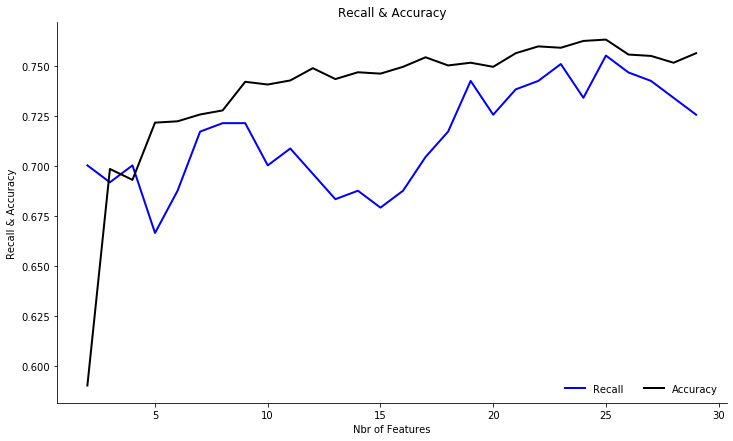

In [29]:
plt.figure(figsize=(12,7))
plt.title("Recall & Accuracy")
plt.ylabel("Recall & Accuracy")
plt.xlabel("Nbr of Features")
sns.despine(left=False, bottom=False, right=True)

plt.plot(result_treeFi["Nbr_features"], result_treeFi.iloc[:,2], lw=2, color='blue', label="Recall")       
plt.plot(result_treeFi["Nbr_features"], result_treeFi.iloc[:,1], lw=2, color='black',  label="Accuracy") 

plt.legend(loc='lower right', frameon=False, ncol=5)
plt.show()

In [30]:
#ideal nbr of Fi = max of averge Accuracy + Recall 
result_treeFi["avg"] = (result_treeFi["Accuracy"] + result_treeFi["Recall"])/2
dfTemp = result_treeFi[result_treeFi["avg"] == max(result_treeFi["avg"])]
nbr_Fi = min(dfTemp.iloc[:,0])
print("Top Nbr of Fis to select : ", nbr_Fi)
dfTemp

Top Nbr of Fis to select :  25


,Nbr_features,Accuracy,Recall,avg
23,25,0.763265,0.755274,0.75927


In [31]:
# selectVars based on ideal nbr of Fi = max of averge Accuracy + Recall 
dfTemp = fi_DF.sort_values(by=["contriVals"], ascending=False)
selectVars = list(dfTemp.head(nbr_Fi)["Vars"])
print("Num Features selected: %s" % len(selectVars), "\n")
print("Features selected: %s" % selectVars, "\n")

inputX4 = DBforTree[selectVars]
#1. Normalize the data
XX = preprocessing.normalize(inputX4 ) #inputX
scaler.fit(inputX4 )
XX = scaler.transform(inputX4 )
YY = targetY.values #inputY

#3. Model
Model  = "LogisticRegression"
ModelX=LogisticRegression(max_iter=1000, random_state=random_seed)
resultDF = ML_models (XX, YY, ModelX)
CM = print_results (resultDF, Model)

Num Features selected: 25 

Features selected: ['joblevel', 'stockoptionlevel', 'overtime', 'jobinvolvement', 'jobsatisfaction', 'department', 'maritalstatus', 'worklifebalance', 'environmentsatisfaction', 'yearswithcurrmanager', 'age', 'numcompaniesworked', 'businesstravel', 'education', 'yearsatcompany', 'yearsincurrentrole', 'educationfield', 'distancefromhome', 'trainingtimeslastyear', 'totalworkingyears', 'relationshipsatisfaction', 'jobrole', 'yearssincelastpromotion', 'dailyrate', 'monthlyincome'] 

LogisticRegression
Accuracy  : 0.763 (+/- 0.03)
f1        : 0.506 (+/- 0.05)
Precision : 0.382 (+/- 0.05)
Recall    : 0.754 (+/- 0.04)


### Feature Selection 4: Recursive Feature Elimination
automatically reduces the number of features involved in a model on the basis of their effective contribution to the performance measure

In [32]:
DBforRFE = inputX4
print(DBforRFE.shape)

(1470, 25)


In [33]:
from sklearn.feature_selection import RFECV
kf = KFold(n_splits=5, random_state=random_seed, shuffle=False)

#1. Normalize the data
XX = preprocessing.normalize(DBforRFE) #inputX
scaler.fit(DBforRFE)
XX = scaler.transform(DBforRFE)
YY = targetY.values #inputY

#2. SMOTE
sm = SMOTE(random_state=random_seed)
X_train_res, y_train_res = sm.fit_sample(XX, YY)

#3. Model + RFECV
ModelX=LogisticRegression(max_iter=1000, random_state=random_seed) 
rfe = RFECV(estimator=ModelX, step=1, cv=kf, scoring = 'accuracy') 
fit = rfe.fit(X_train_res, y_train_res)

#4. get fi ranking
fi_rank = pd.DataFrame({"Vars": DBforRFE.columns, "rank": fit.ranking_}).sort_values(by="rank")

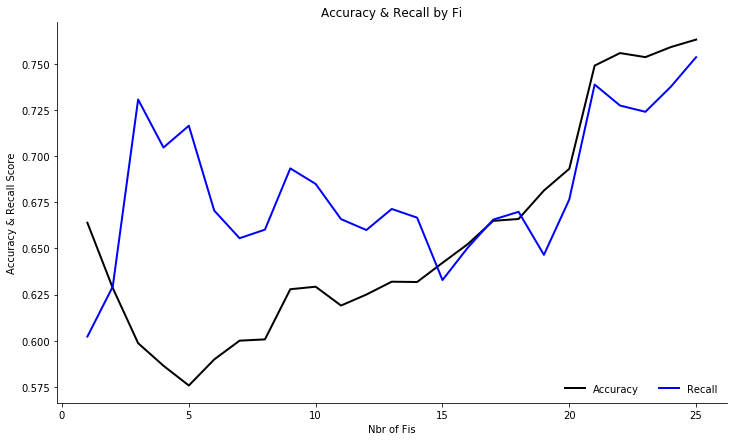

In [34]:
iteraList, accuracyList, recallList = [], [], []
for i in range(1, len(fi_rank)+1):
    selectVars = list(fi_rank.head(i).iloc[:,0])
    DB_subset = DBforRFE[selectVars]

    #1. Normalize the data
    scaler.fit(DB_subset)
    XX = scaler.transform(DB_subset) #inputX
    YY = targetY.values #inputY

    # ====  re-run with the subset features === 
    Model  = "LogisticRegression"
    ModelX=LogisticRegression(max_iter=1000, random_state=random_seed) #class_weight=cw
    resultDF = ML_models(XX, YY, ModelX)

    B = np.mean(resultDF["Recall"].unique())
    A = np.mean(resultDF["Accuracy"].unique())
    
    iteraList.append(i)
    accuracyList.append(A)
    recallList.append(B)

avgAccRecall = [(x+y)/2 for x,y in zip(accuracyList, recallList)]
plt.figure(figsize=(12,7))
plt.title("Accuracy & Recall by Fi")
plt.ylabel("Accuracy & Recall Score")
plt.xlabel("Nbr of Fis")
sns.despine(left=False, bottom=False, right=True)

plt.plot(iteraList, accuracyList, lw=2, color="Black", label="Accuracy")
plt.plot(iteraList, recallList, lw=2, color="Blue", label="Recall")
plt.legend(loc='lower right', frameon=False, ncol=5)
plt.show()

In [35]:
#selectVars based on ideal nbr of Fi = max of averge Accuracy + Recall 
avgAccRecall = [(x+y)/2 for x,y in zip(accuracyList, recallList)]
nbrOfFi = avgAccRecall.index(max(avgAccRecall))+1

selectVars = list(fi_rank.head(nbrOfFi).iloc[:,0])
inputX5 = DBforRFE[selectVars]
print("Num Features selected: %s" % len(selectVars), "\n")
print("Features selected: %s" % selectVars, "\n")

#1. Normalize the data
scaler.fit(inputX5)
XX = scaler.transform(inputX5)
YY = targetY.values #inputY

# ====  re-run with the subset features === 
Model  = "LogisticRegression"
ModelX=LogisticRegression(max_iter=1000, random_state=random_seed) #class_weight=cw
resultDF = ML_models(XX, YY, ModelX)
result_CM = print_results(resultDF, Model) 

Num Features selected: 25 

Features selected: ['joblevel', 'yearssincelastpromotion', 'jobrole', 'relationshipsatisfaction', 'totalworkingyears', 'trainingtimeslastyear', 'distancefromhome', 'educationfield', 'yearsincurrentrole', 'yearsatcompany', 'dailyrate', 'monthlyincome', 'age', 'yearswithcurrmanager', 'environmentsatisfaction', 'worklifebalance', 'maritalstatus', 'department', 'jobsatisfaction', 'jobinvolvement', 'overtime', 'numcompaniesworked', 'businesstravel', 'stockoptionlevel', 'education'] 

LogisticRegression
Accuracy  : 0.763 (+/- 0.03)
f1        : 0.506 (+/- 0.05)
Precision : 0.382 (+/- 0.05)
Recall    : 0.754 (+/- 0.04)


## ROC for Logistic Regression

Logistic: ROC AUC =  0.8357547514619884


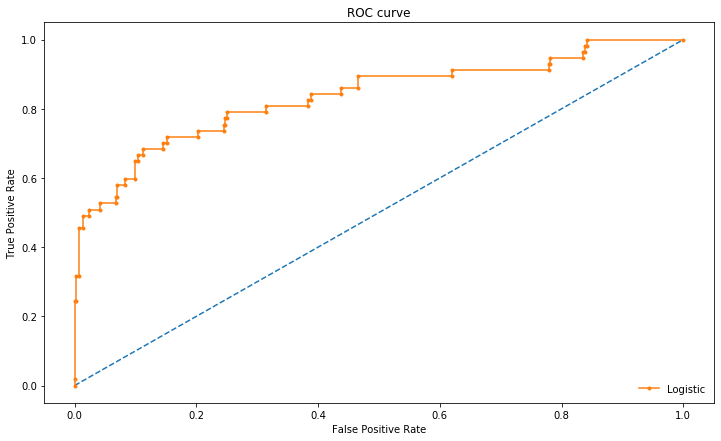

In [36]:
#1. Normalize the data
scaler.fit(inputX5)
XX = scaler.transform(inputX5)
YY = targetY.values

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(XX, YY, test_size=0.3, random_state=random_seed)

#4. SMOTE 
sm = SMOTE(random_state=random_seed)
trainX_res, trainy_res = sm.fit_sample(trainX, trainy)    
        
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]

# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX_res, trainy_res)

# predict probabilities
lr_probs = model.predict_proba(testX)
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
print("Logistic: ROC AUC = ", lr_auc)

# plot the roc curve for the model
plt.figure(figsize=(12,7))
plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right', frameon=False, ncol=5)
plt.show()

## Finally Ensemble | voting method

In [37]:
DBforEnsemble = inputX5
print(DBforEnsemble.shape)

(1470, 25)


In [38]:
#1. Normalize the data
XX = preprocessing.normalize(DBforEnsemble) #inputX
scaler.fit(DBforEnsemble)
XX = scaler.transform(DBforEnsemble)
YY = targetY.values

from sklearn.linear_model import LogisticRegression 
Model = "LogisticRegression"
ModelX=LogisticRegression(max_iter=1000, random_state=random_seed)
resultDF = ML_models (XX, YY, ModelX)
pred_1 = resultDF["y_Pred"]

from sklearn.ensemble import AdaBoostClassifier
Model = "AdaBoostClassifier"
ModelX = AdaBoostClassifier(learning_rate=0.01, random_state=random_seed)
resultDF = ML_models (XX, YY, ModelX)
pred_2 = resultDF["y_Pred"]

from sklearn.linear_model import SGDClassifier
Model  = "SGDClassifier"
ModelX = SGDClassifier(random_state=random_seed)
resultDF = ML_models (XX, YY, ModelX)
pred_3 = resultDF["y_Pred"]

pred_123 = pd.DataFrame({"pred1": pred_1, "pred2": pred_2, "pred3": pred_3})

In [39]:
#get the vote counts
mode2= []
for i in range(len(pred_123)):
    mode = pred_123.iloc[i,:].value_counts().index[0] #get the mode, if no mode, then take highest value 
    mode2.append(mode)
    
pred_123["vote"] = mode2
pred_123["empID"] =pred_123.index.to_series().map(IDindexMapper)
pred_overall = pred_123.merge(raw.loc[:,["empID", "attrition"]], on="empID", how="right", validate="one_to_one")
pred_overall.insert(0, "empID", pred_overall.pop("empID"))

In [40]:
t1 = pd.crosstab(index =pred_overall["attrition"] , columns=pred_overall["vote"], dropna=False, margins=True)
pd.crosstab(index =pred_overall["attrition"] , columns=pred_overall["vote"], dropna=False, margins=True)

vote,0.0,1.0,All
attrition,,,
No,862,371,1233
Yes,49,188,237
All,911,559,1470


In [41]:
pred_overall["attrition1"] = pred_overall["attrition"].apply(lambda x: 1 if x == "Yes" else 0 )
actual = pred_overall["attrition1"]
pred = pred_overall["vote"]

a = accuracy_score(actual, pred)
b = f1_score(actual, pred)
c = precision_score(actual, pred)
d = recall_score(actual, pred, average='binary', pos_label=1, zero_division="warn")

print("===================")
print( "Ensemble voting")
print("===================")
print("Accuracy  : %0.3f " % (a.mean()))
print("f1        : %0.3f " % (b.mean()))
print("Precision : %0.3f " % (c.mean()))
print("Recall    : %0.3f " % (d.mean()))

Ensemble voting
Accuracy  : 0.714 
f1        : 0.472 
Precision : 0.336 
Recall    : 0.793 
